In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# I get the data per minute, the goal is to check how the price change in the first minutes of days with high volatility)

x_m= get_pricing('TSLA', start_date='2020-01-01',end_date='2020-07-07', frequency='minute')

# I get the daily data to select which days had hihg volatility

x_d= get_pricing('TSLA', start_date='2020-01-01',end_date='2020-07-07', frequency='daily')

In [8]:
# This represent the perecentage difference of the price of the stock between the close of the previous day,
# and the open price of the current day

x_d['overnight change']=(x_d['open_price']- x_d['close_price'].shift(1))/x_d['close_price'].shift(1)

# This represent the perecentage difference of the price of the stock between the close,
# and the open price of the previous day

x_d['previous_day_change']=(x_d['close_price'].shift(1)-x_d['open_price'].shift(1))/x_d['open_price'].shift(1)

# This is the exponential weight average of the open price of the current day with a window of 20 days 

x_d['open EWMA 20 days'] = x_d['open_price'].ewm(span=20).mean()

In [32]:
high_volatility=x_d[abs(x_d['overnight change'])>=0.05]

len(high_volatility)

26

In [33]:
# Extra filter to select some day to do not trade, those are days where the stock lose value overnight
# But it is far away from the EWMA, therefore, there is chance the stock don't have the strenght to bounce back

not_trade= (abs((high_volatility['open_price']/high_volatility['open EWMA 20 days'])-1)>=0.15)&((high_volatility['overnight change'])<-0.04)


# Days where is better to do not trade

high_volatility[not_trade]

,open_price,high,low,close_price,volume,price,overnight change,previous_day_change,open EWMA 20 days
2020-02-05 00:00:00+00:00,823.26,845.980,704.111,734.72,29495702.0,734.72,-0.072613,0.005391,624.098930
2020-02-28 00:00:00+00:00,629.70,690.520,611.520,665.32,15779441.0,665.32,-0.072402,-0.070068,761.128006
2020-03-09 00:00:00+00:00,605.39,662.998,605.000,606.46,10798120.0,606.46,-0.139325,0.019400,737.134680
2020-03-12 00:00:00+00:00,580.89,594.500,546.250,556.01,12231893.0,556.01,-0.083632,-0.009833,707.624774
2020-03-16 00:00:00+00:00,469.50,494.870,442.170,444.98,13843794.0,444.98,-0.140425,-0.082017,675.043801
2020-03-18 00:00:00+00:00,389.00,404.860,350.510,361.60,16802470.0,361.60,-0.095349,-0.022749,627.311982


In [34]:
len(high_volatility[not_trade])

6

In [35]:
# Here I made a dictionary with the different dates that I want to plot

table={}
i=-1

for x in high_volatility.index.date:
    i=i+1
    table[i]=x.strftime('%Y-%m-%d')

In [36]:
# Here I made a dictionary in which each key is a full data frame of a day
# whith each data frame I can plot what I need

imp_dates={}

for item in table.values():
    imp_dates[item]=x_m['open_price'][item]

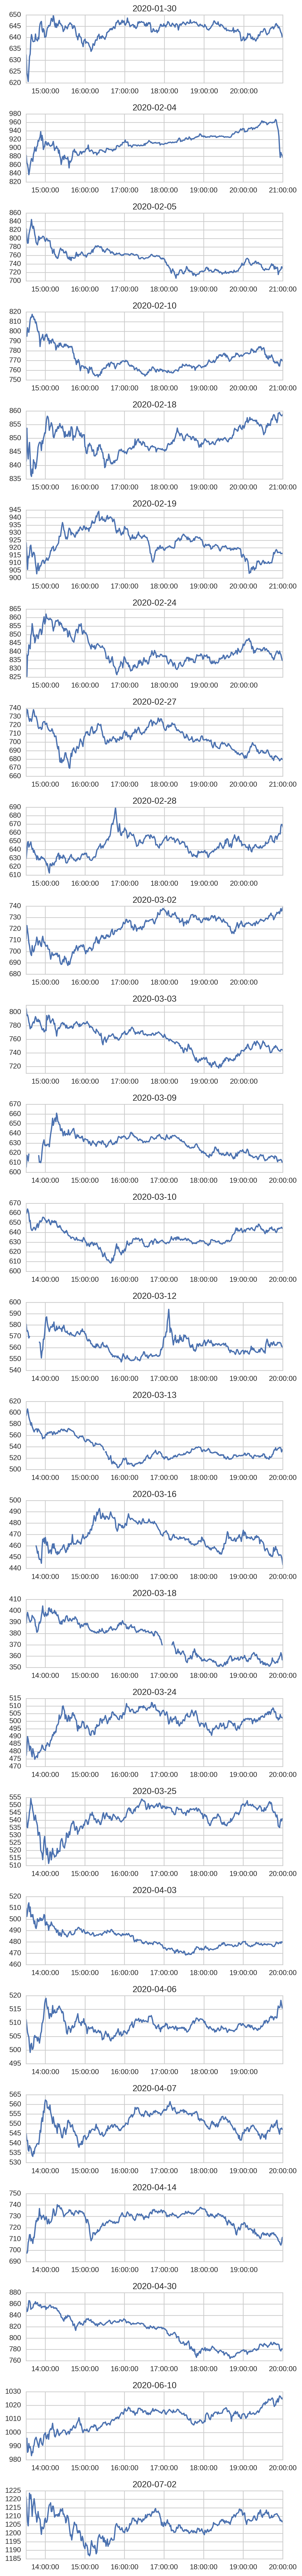

In [38]:
# In this way I can print one picture per each data frame in the dictionary
# The order depend in the dictionary order.


fig_1, axes = plt.subplots(nrows=len(imp_dates.keys()), ncols=1, figsize=(6,50), dpi=300)

fig_dic={}
i=-1

for item in sorted(imp_dates.keys()):
    i=i+1
    axes[i].plot(imp_dates[item])
    axes[i].set_title(item)
    
plt.tight_layout()

In [29]:
high_volatility

,open_price,high,low,close_price,volume,price,overnight change,previous_day_change,open EWMA 20 days
2020-01-30 00:00:00+00:00,15.63,16.520,15.630,16.420,1305016.0,16.420,-0.053874,-0.038417,17.454417
2020-02-24 00:00:00+00:00,14.62,14.680,14.060,14.210,1102911.0,14.210,-0.051265,-0.001296,16.365034
2020-02-27 00:00:00+00:00,12.26,12.710,11.820,11.900,2067755.0,11.900,-0.053282,-0.079602,15.604664
2020-02-28 00:00:00+00:00,11.18,11.480,10.910,11.330,1666614.0,11.330,-0.060504,-0.029364,15.175432
2020-03-05 00:00:00+00:00,10.10,10.180,8.650,9.050,3229665.0,9.050,-0.077457,-0.025979,13.803028
2020-03-06 00:00:00+00:00,8.53,9.470,8.500,9.150,3510063.0,9.150,-0.057459,-0.103960,13.295215
2020-03-09 00:00:00+00:00,7.92,8.320,7.385,7.460,1318876.0,7.460,-0.134426,0.072685,12.778112
2020-03-10 00:00:00+00:00,8.20,8.440,7.370,7.648,1761279.0,7.648,0.099196,-0.058081,12.338115
2020-03-12 00:00:00+00:00,5.23,5.380,4.015,4.310,2453027.0,4.310,-0.217066,-0.129074,11.250847
2020-03-13 00:00:00+00:00,4.82,5.130,4.040,4.780,3492489.0,4.780,0.118329,-0.175908,10.634248


In [42]:
imp_dates['2020-02-04']

2020-02-04 14:31:00+00:00    882.960
2020-02-04 14:32:00+00:00    865.030
2020-02-04 14:33:00+00:00    861.455
2020-02-04 14:34:00+00:00    851.250
2020-02-04 14:35:00+00:00    837.260
2020-02-04 14:36:00+00:00    846.170
2020-02-04 14:37:00+00:00    859.000
2020-02-04 14:38:00+00:00    868.060
2020-02-04 14:39:00+00:00    875.450
2020-02-04 14:40:00+00:00    873.130
2020-02-04 14:41:00+00:00    868.535
2020-02-04 14:42:00+00:00    885.120
2020-02-04 14:43:00+00:00    891.180
2020-02-04 14:44:00+00:00    901.920
2020-02-04 14:45:00+00:00    893.350
2020-02-04 14:46:00+00:00    892.800
2020-02-04 14:47:00+00:00    903.105
2020-02-04 14:48:00+00:00    905.000
2020-02-04 14:49:00+00:00    917.530
2020-02-04 14:50:00+00:00    916.000
2020-02-04 14:51:00+00:00    922.000
2020-02-04 14:52:00+00:00    926.300
2020-02-04 14:53:00+00:00    938.457
2020-02-04 14:54:00+00:00    918.000
2020-02-04 14:55:00+00:00    929.780
2020-02-04 14:56:00+00:00    920.480
2020-02-04 14:57:00+00:00    896.510
2

In [19]:
x_d.loc['2020-02-10']

open_price             8.000000e+02
high                   8.199900e+02
low                    7.524000e+02
close_price            7.708470e+02
volume                 1.520489e+07
price                  7.708470e+02
overnight change       6.954588e-02
previous_day_change    2.386011e-02
open EWMA 20 days      6.582234e+02
Name: 2020-02-10 00:00:00+00:00, dtype: float64

In [23]:
x_d.tail(7)

,open_price,high,low,close_price,volume,price,overnight change,previous_day_change,open EWMA 20 days
2020-06-24 00:00:00+00:00,994.11,1000.885,953.141,960.85,6956258.0,960.85,-0.007537,0.002783,944.184059
2020-06-25 00:00:00+00:00,954.27,985.980,937.150,985.98,5858068.0,985.98,-0.006848,-0.033457,945.144629
2020-06-26 00:00:00+00:00,994.78,995.000,954.870,960.76,5019546.0,960.76,0.008925,0.033230,949.871829
2020-06-29 00:00:00+00:00,969.01,1010.000,948.520,1009.89,5488160.0,1009.89,0.008587,-0.034199,951.694519
2020-06-30 00:00:00+00:00,1006.50,1087.690,1003.730,1079.00,10406340.0,1079.00,-0.003357,0.042187,956.914108
2020-07-01 00:00:00+00:00,1083.00,1135.330,1080.500,1119.54,7873869.0,1119.54,0.003707,0.072032,968.922328
2020-07-02 00:00:00+00:00,1221.48,1228.000,1185.600,1208.80,9373750.0,1208.80,0.091055,0.033740,992.975512


In [10]:
x_m['2020-06-25']

,open_price,high,low,close_price,volume,price
2020-06-25 13:31:00+00:00,954.270,955.500,951.500,953.530,100862.0,953.530
2020-06-25 13:32:00+00:00,953.745,957.400,953.650,956.698,32373.0,956.698
2020-06-25 13:33:00+00:00,956.832,957.800,948.010,950.020,51145.0,950.020
2020-06-25 13:34:00+00:00,949.346,951.570,948.140,950.094,42706.0,950.094
2020-06-25 13:35:00+00:00,949.785,950.000,945.530,948.710,52098.0,948.710
2020-06-25 13:36:00+00:00,948.495,952.830,946.980,947.870,36178.0,947.870
2020-06-25 13:37:00+00:00,948.000,950.000,947.160,949.654,19774.0,949.654
2020-06-25 13:38:00+00:00,949.550,950.640,945.450,945.800,35110.0,945.800
2020-06-25 13:39:00+00:00,945.470,947.370,944.060,944.250,50046.0,944.250
2020-06-25 13:40:00+00:00,944.388,947.660,944.388,947.335,38356.0,947.335
